# Introduction

Do higher film budgets lead to more box office revenue? Let's find out if there's a relationship using the movie budgets and financial performance data that I've scraped from [the-numbers.com](https://www.the-numbers.com/movie/budgets) on **May 1st, 2018**.

<img src=https://i.imgur.com/kq7hrEh.png>

# Import Statements

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Notebook Presentation

In [2]:
pd.options.display.float_format = '{:,.2f}'.format

from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

# Read the Data

In [3]:
data = pd.read_csv('cost_revenue_dirty.csv')

# Explore and Clean the Data

**Challenge**: Answer these questions about the dataset:
1. How many rows and columns does the dataset contain?
2. Are there any NaN values present?
3. Are there any duplicate rows?
4. What are the data types of the columns?

In [4]:
'''
Solution for Challenge 1

With any new dataset, it's a good idea to do some standard checks and conversions.
I typically always first look at .shape, .head(), .tail(), .info() and .sample().
Here's what I'm spotting already:
'''

data.head()

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
0,5293,8/2/1915,The Birth of a Nation,"$110,000","$11,000,000","$10,000,000"
1,5140,5/9/1916,Intolerance,"$385,907",$0,$0
2,5230,12/24/1916,"20,000 Leagues Under the Sea","$200,000","$8,000,000","$8,000,000"
3,5299,9/17/1920,Over the Hill to the Poorhouse,"$100,000","$3,000,000","$3,000,000"
4,5222,1/1/1925,The Big Parade,"$245,000","$22,000,000","$11,000,000"


In [5]:
data.tail()

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
5386,2950,10/8/2018,Meg,"$15,000,000",$0,$0
5387,126,12/18/2018,Aquaman,"$160,000,000",$0,$0
5388,96,12/31/2020,Singularity,"$175,000,000",$0,$0
5389,1119,12/31/2020,Hannibal the Conqueror,"$50,000,000",$0,$0
5390,2517,12/31/2020,"Story of Bonnie and Clyde, The","$20,000,000",$0,$0


In [6]:
data.shape

(5391, 6)

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5391 entries, 0 to 5390
Data columns (total 6 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Rank                   5391 non-null   int64 
 1   Release_Date           5391 non-null   object
 2   Movie_Title            5391 non-null   object
 3   USD_Production_Budget  5391 non-null   object
 4   USD_Worldwide_Gross    5391 non-null   object
 5   USD_Domestic_Gross     5391 non-null   object
dtypes: int64(1), object(5)
memory usage: 252.8+ KB


In [8]:
data.sample()

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
489,4364,11/20/1987,Teen Wolf Too,"$3,000,000","$7,888,000","$7,888,000"


### Data Type Conversions

In [9]:
# We can check for NaN values with this line:

data.isna().values.any()

False

In [10]:
# And check for duplicates with this line:

data.duplicated().values.any()

False

In [11]:
'''
We can see the total number of duplicates by creating a subset and looking at the length of that subset:
'''

duplicated_rows = data[data.duplicated()]
len(duplicated_rows)

0

In [12]:
'''
The fact that there are no duplicates or NaN (not-a-number) values in the dataset will make our job easier.
We can also see if there are null values in .info(),
which also shows us that we need to do some type conversion.
'''

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5391 entries, 0 to 5390
Data columns (total 6 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Rank                   5391 non-null   int64 
 1   Release_Date           5391 non-null   object
 2   Movie_Title            5391 non-null   object
 3   USD_Production_Budget  5391 non-null   object
 4   USD_Worldwide_Gross    5391 non-null   object
 5   USD_Domestic_Gross     5391 non-null   object
dtypes: int64(1), object(5)
memory usage: 252.8+ KB


**Challenge**: Convert the `USD_Production_Budget`, `USD_Worldwide_Gross`, and `USD_Domestic_Gross` columns to a numeric format by removing `$` signs and `,`.
<br>
<br>
Note that *domestic* in this context refers to the United States.

In [13]:
'''
In order to convert the data in the budget and revenue columns and remove all the non-numeric characters, we can use a nested for loop.
We create two Python lists: the characters to remove and the column names.
Inside the nested loop we can combine .replace() and .to_numeric() to achieve our goal.
'''

chars_to_remove = [',', '$']
columns_to_clean = ['USD_Production_Budget',
                    'USD_Worldwide_Gross',
                    'USD_Domestic_Gross']

for col in columns_to_clean:
    for char in chars_to_remove:
        # Replace each character with an empty string
        data[col] = data[col].astype(str).str.replace(char, "")
    # Convert column to a numeric data type
    data[col] = pd.to_numeric(data[col])

data.head()

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
0,5293,8/2/1915,The Birth of a Nation,110000,11000000,10000000
1,5140,5/9/1916,Intolerance,385907,0,0
2,5230,12/24/1916,"20,000 Leagues Under the Sea",200000,8000000,8000000
3,5299,9/17/1920,Over the Hill to the Poorhouse,100000,3000000,3000000
4,5222,1/1/1925,The Big Parade,245000,22000000,11000000


**Challenge**: Convert the `Release_Date` column to a Pandas Datetime type.

In [14]:
'''
To convert the Release_Date column to a DateTime object, all we need to do is call the to_datetime() function.

data.Release_Date = pd.to_datetime(data.Release_Date)

When we check .info() again we see that the columns now have the desired data type. This allows us to proceed with the next parts of our analysis.
'''

data.Release_Date = pd.to_datetime(data.Release_Date)

In [15]:
data.head()

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
0,5293,1915-08-02,The Birth of a Nation,110000,11000000,10000000
1,5140,1916-05-09,Intolerance,385907,0,0
2,5230,1916-12-24,"20,000 Leagues Under the Sea",200000,8000000,8000000
3,5299,1920-09-17,Over the Hill to the Poorhouse,100000,3000000,3000000
4,5222,1925-01-01,The Big Parade,245000,22000000,11000000


### Descriptive Statistics

**Challenge**:

1. What is the average production budget of the films in the data set?
2. What is the average worldwide gross revenue of films?
3. What were the minimums for worldwide and domestic revenue?
4. Are the bottom 25% of films actually profitable or do they lose money?
5. What are the highest production budget and highest worldwide gross revenue of any film?
6. How much revenue did the lowest and highest budget films make?

In [16]:
data.head()

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
0,5293,1915-08-02,The Birth of a Nation,110000,11000000,10000000
1,5140,1916-05-09,Intolerance,385907,0,0
2,5230,1916-12-24,"20,000 Leagues Under the Sea",200000,8000000,8000000
3,5299,1920-09-17,Over the Hill to the Poorhouse,100000,3000000,3000000
4,5222,1925-01-01,The Big Parade,245000,22000000,11000000


In [17]:
# We can answer many of the questions with a single command: .describe().

data.describe()

,Rank,Release_Date,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
count,"5,391.00",5391,"5,391.00","5,391.00","5,391.00"
mean,"2,696.00",2003-09-19 15:02:02.203672704,"31,113,737.58","88,855,421.96","41,235,519.44"
min,1.00,1915-08-02 00:00:00,"1,100.00",0.00,0.00
25%,"1,348.50",1999-12-02 12:00:00,"5,000,000.00","3,865,206.00","1,330,901.50"
50%,"2,696.00",2006-06-23 00:00:00,"17,000,000.00","27,450,453.00","17,192,205.00"
75%,"4,043.50",2011-11-23 00:00:00,"40,000,000.00","96,454,455.00","52,343,687.00"
max,"5,391.00",2020-12-31 00:00:00,"425,000,000.00","2,783,918,982.00","936,662,225.00"
std,"1,556.39",NaN,"40,523,796.88","168,457,757.00","66,029,346.27"


In [18]:
'''
The average film costs about $31m to make and makes around 3x that (or ~$89m) in worldwide revenue. So that's encouraging.

But quite a lot of films lose money too. In fact, all the films in the bottom quartile lose money,
since the average cost is $5 million and they only bring in $3.8m in worldwide revenue!

The minimum domestic and worldwide revenue is $0. That makes sense. If a film never gets screened or is cancelled,
then this is the number we would expect to see here.

On the other hand, the highest production budget was $425,000,000 and the highest worldwide revenue was $2,783,918,982. $2.7 Billion revenue! Holy smokes.

So which film was the lowest budget film in the dataset?
'''

data[data.USD_Production_Budget == 1100.00]

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
2427,5391,2005-05-08,My Date With Drew,1100,181041,181041


In [19]:
# And the highest budget film in the dataset is:

data[data.USD_Production_Budget == 425000000.00]

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
3529,1,2009-12-18,Avatar,425000000,2783918982,760507625


# Investigating the Zero Revenue Films

**Challenge** How many films grossed $0 domestically (i.e., in the United States)? What were the highest budget films that grossed nothing?

In [20]:
'''
We see that there are 512 films in the dataset that had no revenue in the United States. However,
the highest budget films with no revenue have a release date AFTER the date on which the dataset was compiled (May 1st, 2018).
'''

zero_domestic = data[data['USD_Domestic_Gross'] == 0]
print(f'Number of lines films that grossed $0 domestically {len(zero_domestic)}')
zero_domestic.sort_values('USD_Production_Budget', ascending=False)

Number of lines films that grossed $0 domestically 512


,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
5388,96,2020-12-31,Singularity,175000000,0,0
5387,126,2018-12-18,Aquaman,160000000,0,0
5384,321,2018-09-03,A Wrinkle in Time,103000000,0,0
5385,366,2018-10-08,Amusement Park,100000000,0,0
5090,556,2015-12-31,"Don Gato, el inicio de la pandilla",80000000,4547660,0
...,...,...,...,...,...,...
4787,5371,2014-12-31,Stories of Our Lives,15000,0,0
3056,5374,2007-12-31,Tin Can Man,12000,0,0
4907,5381,2015-05-19,Family Motocross,10000,0,0
5006,5389,2015-09-29,Signed Sealed Delivered,5000,0,0


**Challenge**: How many films grossed $0 worldwide? What are the highest budget films that had no revenue internationally?

In [21]:
'''
When we check worldwide revenue instead, we see that there are 357 films that made no money internationally.
Once again, some of the films have not been released yet at the time the data was compiled. However, 512 versus 357. Why is there a difference?

The reason some international films were never screened in the United States.
In fact, we can see an example of this in our previous screenshot. "Don Gato, el inicio de la pandilla" made about $4.5 million dollars in the box office,
but nothing in the United States. Perhaps they should have screened it there too, considering it cost $80 million to make!
'''

zero_worldwide = data[data.USD_Worldwide_Gross == 0]
print(f'Number of films that grossed $0 domestically {len(zero_worldwide)}')

zero_worldwide.sort_values('USD_Production_Budget', ascending=False)

Number of films that grossed $0 domestically 357


,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
5388,96,2020-12-31,Singularity,175000000,0,0
5387,126,2018-12-18,Aquaman,160000000,0,0
5384,321,2018-09-03,A Wrinkle in Time,103000000,0,0
5385,366,2018-10-08,Amusement Park,100000000,0,0
5058,880,2015-11-12,The Ridiculous 6,60000000,0,0
...,...,...,...,...,...,...
4787,5371,2014-12-31,Stories of Our Lives,15000,0,0
3056,5374,2007-12-31,Tin Can Man,12000,0,0
4907,5381,2015-05-19,Family Motocross,10000,0,0
5006,5389,2015-09-29,Signed Sealed Delivered,5000,0,0


### Filtering on Multiple Conditions

In [22]:
'''
So far, we've created subsets for our DataFrames based on a single condition. But what if we want to select our data based on more than one condition?
For example, which films made money internationally (i.e., data.USD_Worldwide_Gross != 0),
but had zero box office revenue in the United States (i.e., data.USD_Domestic_Gross == 0)?

How would we create a filter for these two conditions? One approach is to use the .loc[] property combined with the bitwise and & operator.
'''

international_release = data.loc[(data.USD_Domestic_Gross == 0) & (data.USD_Worldwide_Gross != 0)]
print(f'Number of international releases: {len(international_release)}')

international_release.head()

Number of international releases: 155


,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
71,4310,1956-02-16,Carousel,3380000,3220,0
1579,5087,2001-02-11,Everything Put Together,500000,7890,0
1744,3695,2001-12-31,The Hole,7500000,10834406,0
2155,4236,2003-12-31,Nothing,4000000,63180,0
2203,2513,2004-03-31,The Touch,20000000,5918742,0


**Challenge**: Use the [`.query()` function](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.query.html) to accomplish the same thing. Create a subset for international releases that had some worldwide gross revenue, but made zero revenue in the United States.

Hint: This time you'll have to use the `and` keyword.

In [23]:
international_release = data.query('USD_Domestic_Gross == 0 and USD_Worldwide_Gross != 0')

print(f'Number of international release: {len(international_release)}')

international_release.tail()

Number of international release: 155


,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
5340,1506,2017-04-14,Queen of the Desert,36000000,1480089,0
5348,2225,2017-05-05,Chāi dàn zhuānjiā,23000000,58807172,0
5360,4832,2017-07-03,Departure,1100000,27561,0
5372,1856,2017-08-25,Ballerina,30000000,48048527,0
5374,4237,2017-08-25,Polina danser sa vie,4000000,36630,0


### Unreleased Films

**Challenge**:
* Identify which films were not released yet as of the time of data collection (May 1st, 2018).
* How many films are included in the dataset that have not yet had a chance to be screened in the box office?
* Create another DataFrame called data_clean that does not include these films.

Now we can turn our attention to films in the dataset that were not released at the time the data was collected. This is why films like Singularity and Aquaman had zero revenue.

In [24]:
# Date of Data Collection
scrape_date = pd.Timestamp('2018-5-1')

In [25]:
'''
There are a total of 7 unreleased films at the time of data collection included in the dataset.
'''

future_release = data[data['Release_Date'] >= scrape_date]

print(f'Number of unreleased movies: {len(future_release)}')
future_release

Number of unreleased movies: 7


,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
5384,321,2018-09-03,A Wrinkle in Time,103000000,0,0
5385,366,2018-10-08,Amusement Park,100000000,0,0
5386,2950,2018-10-08,Meg,15000000,0,0
5387,126,2018-12-18,Aquaman,160000000,0,0
5388,96,2020-12-31,Singularity,175000000,0,0
5389,1119,2020-12-31,Hannibal the Conqueror,50000000,0,0
5390,2517,2020-12-31,"Story of Bonnie and Clyde, The",20000000,0,0


In [26]:
# From this point on, we'll work with another DataFrame called data_clean that does not include these films.

data_clean = data.drop(future_release.index)
data_clean

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
0,5293,1915-08-02,The Birth of a Nation,110000,11000000,10000000
1,5140,1916-05-09,Intolerance,385907,0,0
2,5230,1916-12-24,"20,000 Leagues Under the Sea",200000,8000000,8000000
3,5299,1920-09-17,Over the Hill to the Poorhouse,100000,3000000,3000000
4,5222,1925-01-01,The Big Parade,245000,22000000,11000000
...,...,...,...,...,...,...
5379,1295,2017-10-02,John Wick: Chapter Two,40000000,166893990,92029184
5380,70,2017-10-03,Kong: Skull Island,185000000,561137727,168052812
5381,94,2017-12-05,King Arthur: Legend of the Sword,175000000,140012608,39175066
5382,1254,2017-12-05,Snatched,42000000,57850343,45850343


### Films that Lost Money

**Challenge**:
What is the percentage of films where the production costs exceeded the worldwide gross revenue?

In [27]:
# Again, there are different ways you could have calculated this. For example, using the .loc[] property,

money_losing = data_clean.loc[data_clean.USD_Production_Budget > data_clean.USD_Worldwide_Gross]

len(money_losing) / len(data_clean)

0.37277117384843983

In [28]:
# or the .query() function

money_losing = data_clean.query('USD_Production_Budget > USD_Worldwide_Gross')

money_losing.shape[0] / data_clean.shape[0]

0.37277117384843983

# Seaborn for Data Viz: Bubble Charts

In [29]:
'''
We're now ready to visualise our data. Today I want to introduce you to another popular data visualisation tool that you can use alongside plotly and Matplotlib:
Seaborn. Seaborn is built on top of Matplotlib and it makes creating certain visualisations very convenient.
'''

"\nWe're now ready to visualise our data. Today I want to introduce you to another popular data visualisation tool that you can use alongside plotly and Matplotlib:\nSeaborn. Seaborn is built on top of Matplotlib and it makes creating certain visualisations very convenient.\n"

<Axes: xlabel='USD_Production_Budget', ylabel='USD_Worldwide_Gross'>

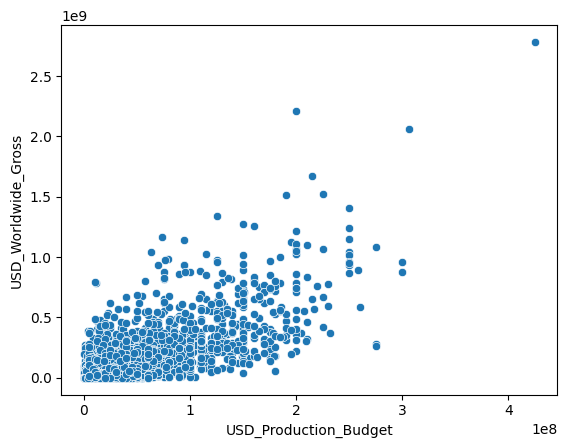

In [30]:
'''
To create a .scatterplot(), all we need to do is supply our DataFrame and the column names that we'd like to see on our axes.
'''

sns.scatterplot(data=data_clean, x='USD_Production_Budget', y='USD_Worldwide_Gross')

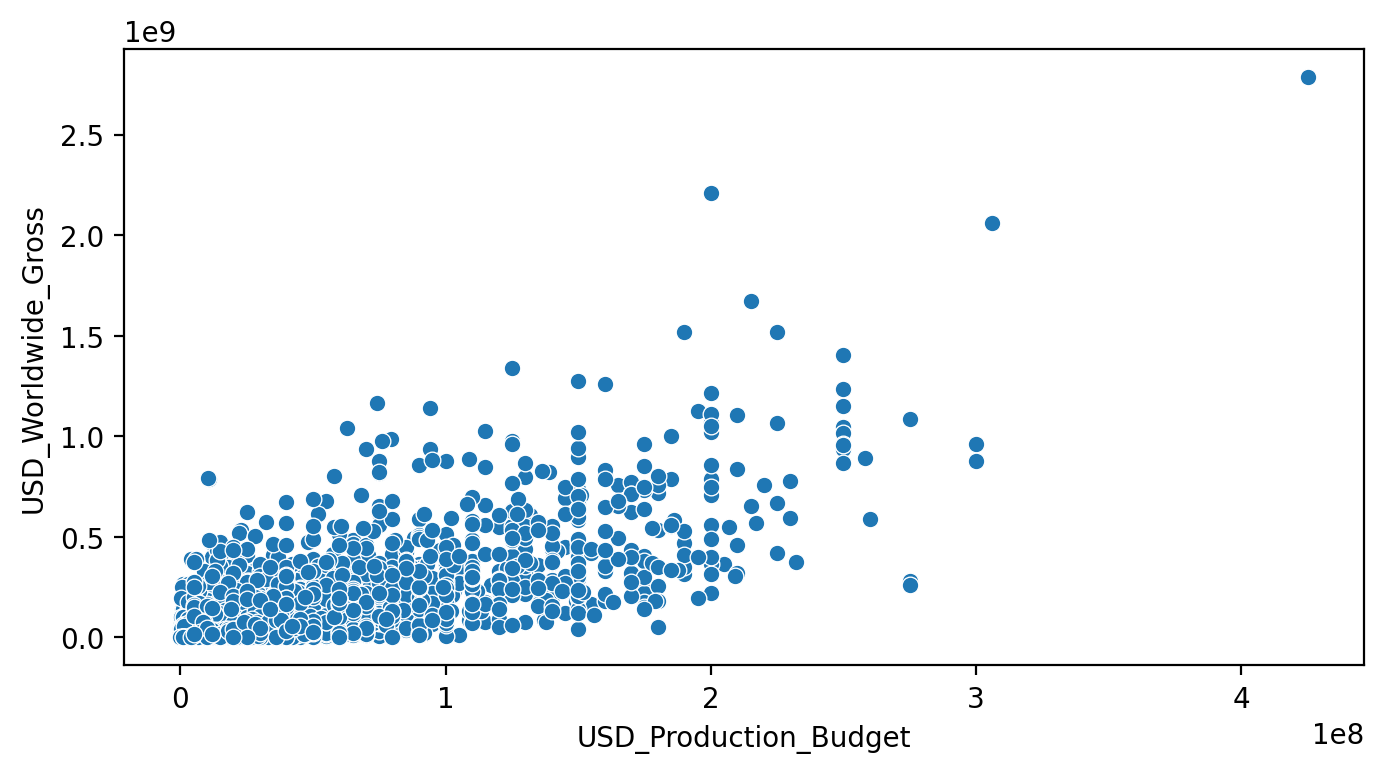

In [31]:
'''
That should look familiar. 😊 Because Seaborn is built on top of Matplotlib, we can dive into the Matplotlib layer anytime to configure our chart.
For example, we can increase the size of our figure:
'''

plt.figure(figsize=(8,4), dpi=200)

sns.scatterplot(data=data_clean, x='USD_Production_Budget', y='USD_Worldwide_Gross')

plt.show()

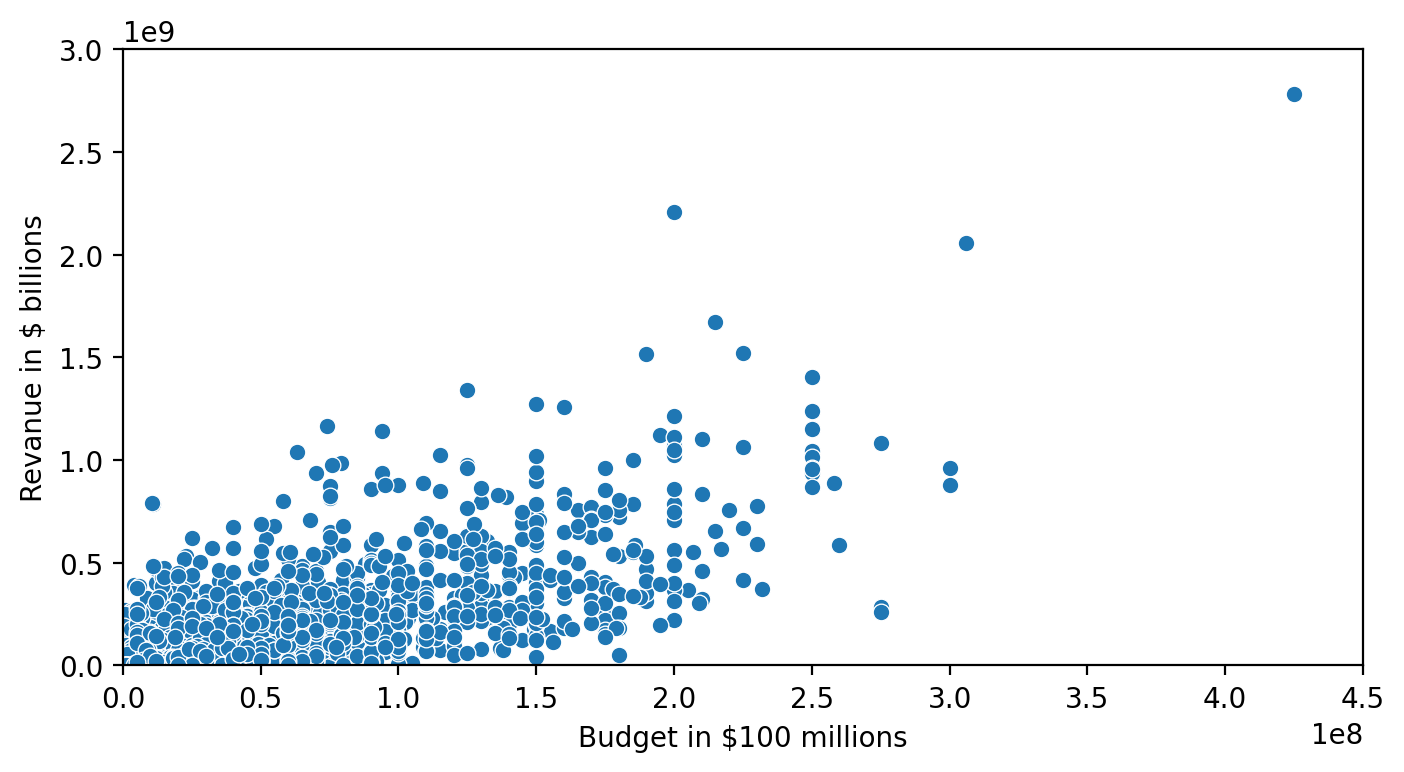

In [32]:
'''
And to style our chart we can simply configure the Axes object that is returned from sns.scatterplot().

Here's how:
'''

plt.figure(figsize=(8, 4), dpi=200)

ax = sns.scatterplot(data_clean, x='USD_Production_Budget', y='USD_Worldwide_Gross')

ax.set(ylim=(0, 3000000000), xlim=(0, 450000000), ylabel='Revanue in $ billions', xlabel='Budget in $100 millions')

plt.show()

### Plotting Movie Releases over Time

**Challenge**: Try to create the following Bubble Chart:

<img src=https://i.imgur.com/8fUn9T6.png>



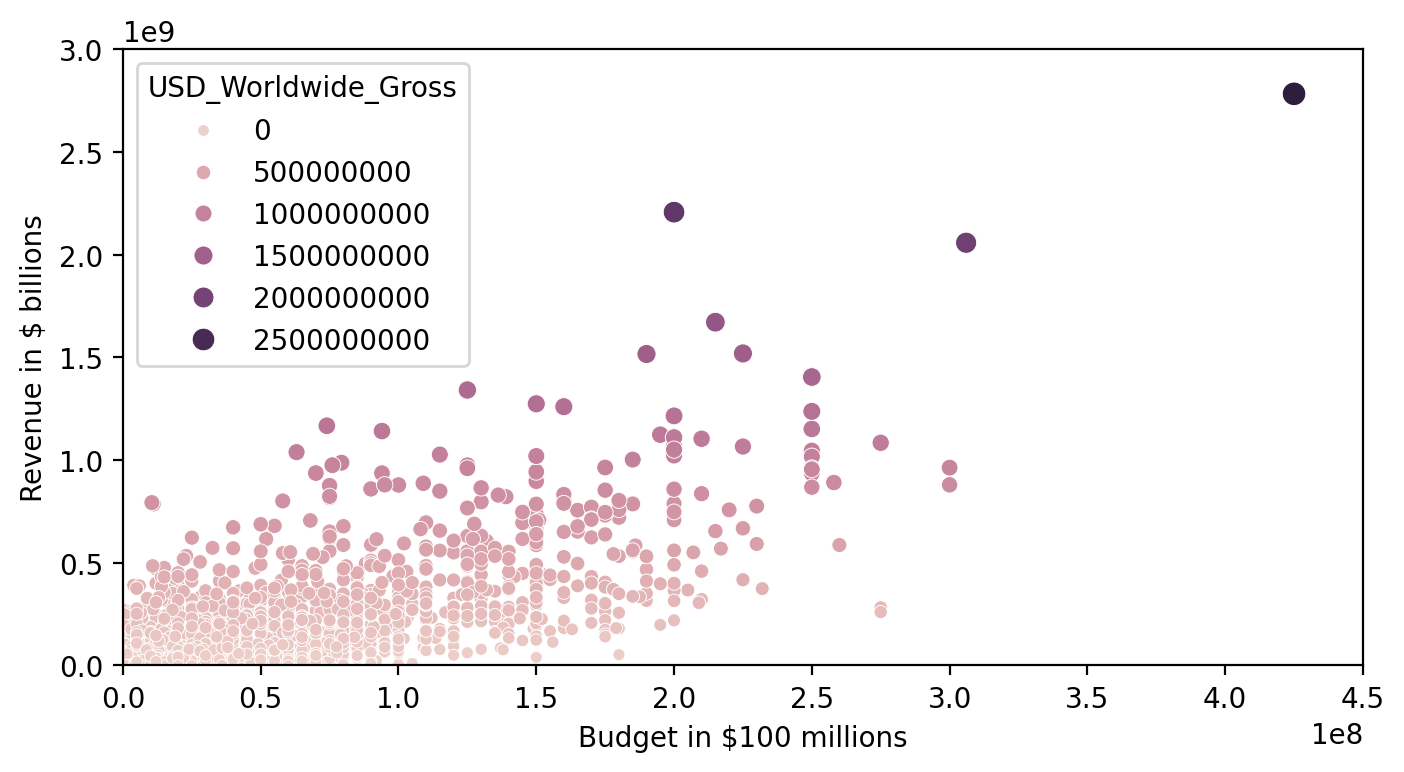

In [33]:
'''
But the reason we're using Seaborn is because of the hue and size parameters that make it very easy to create a bubble chart.
These parameters allow us to colour the data and change their size according to one of the columns in our DataFrame.
'''

plt.figure(figsize=(8, 4), dpi=200)
ax = sns.scatterplot(data=data_clean, x='USD_Production_Budget', y='USD_Worldwide_Gross', hue='USD_Worldwide_Gross', # Color
                                                                                          size='USD_Worldwide_Gross',) # dot size
ax.set(ylim=(0, 3000000000), xlim=(0, 450000000), ylabel='Revenue in $ billions', xlabel='Budget in $100 millions')

plt.show()


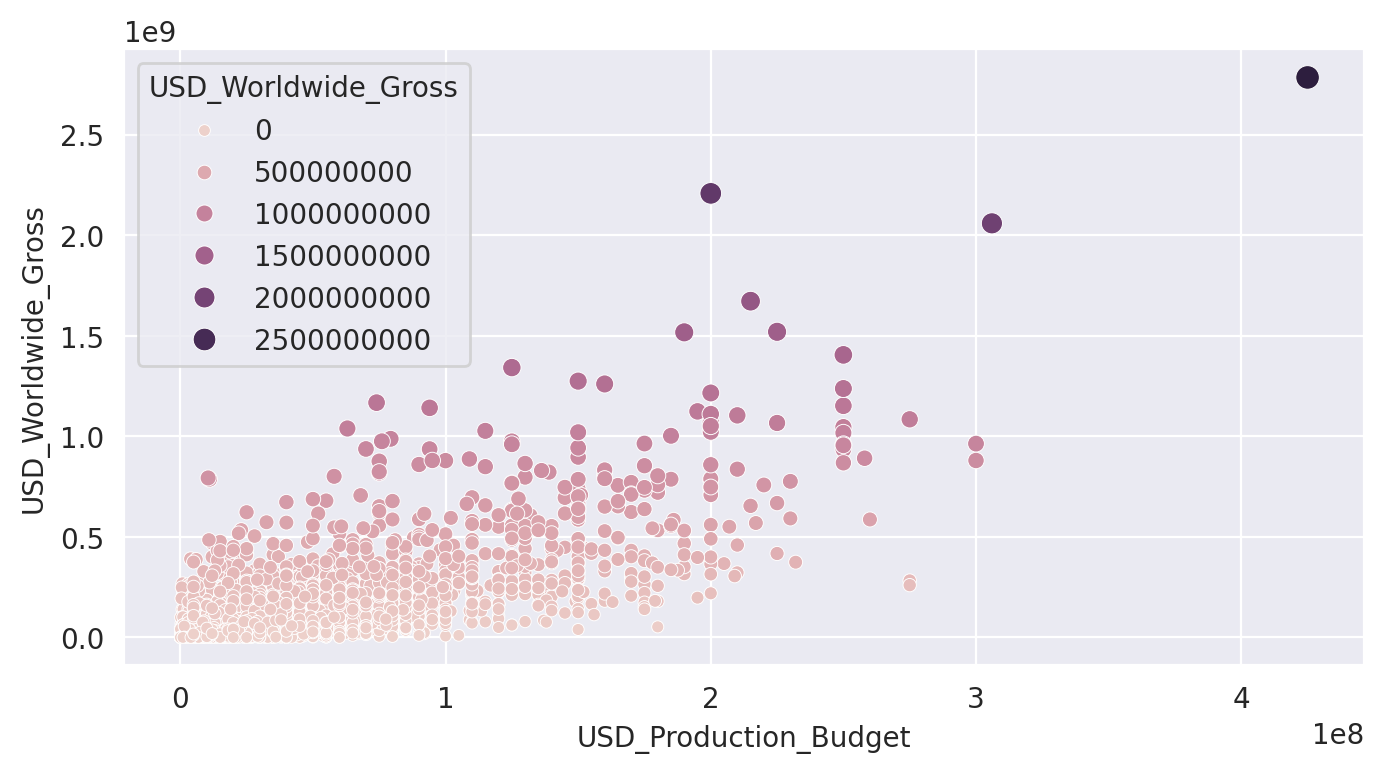

In [34]:
'''
Now our higher grossing movies are bigger and darker on our chart. That's super handy. But Seaborn offers a number of convenient styling options as well.

To set the styling on a single chart (as opposed to all the charts in the entire notebook) we can use Python's with keyword.
We've seen with used already when it comes to opening files in previous lessons.
'''

plt.figure(figsize=(8,4), dpi=200)

# Set styling on a single chart
with sns.axes_style('darkgrid'):
  sns.scatterplot(data=data_clean, x='USD_Production_Budget',
                                      y='USD_Worldwide_Gross',
                                      hue='USD_Worldwide_Gross',
                                      size='USD_Worldwide_Gross')

  ax.set(ylim=(0, 3000000000),
         xlim=(0, 450000000),
         ylabel='Revenue in $ billions',
         xlabel='Budget in $100 millions')

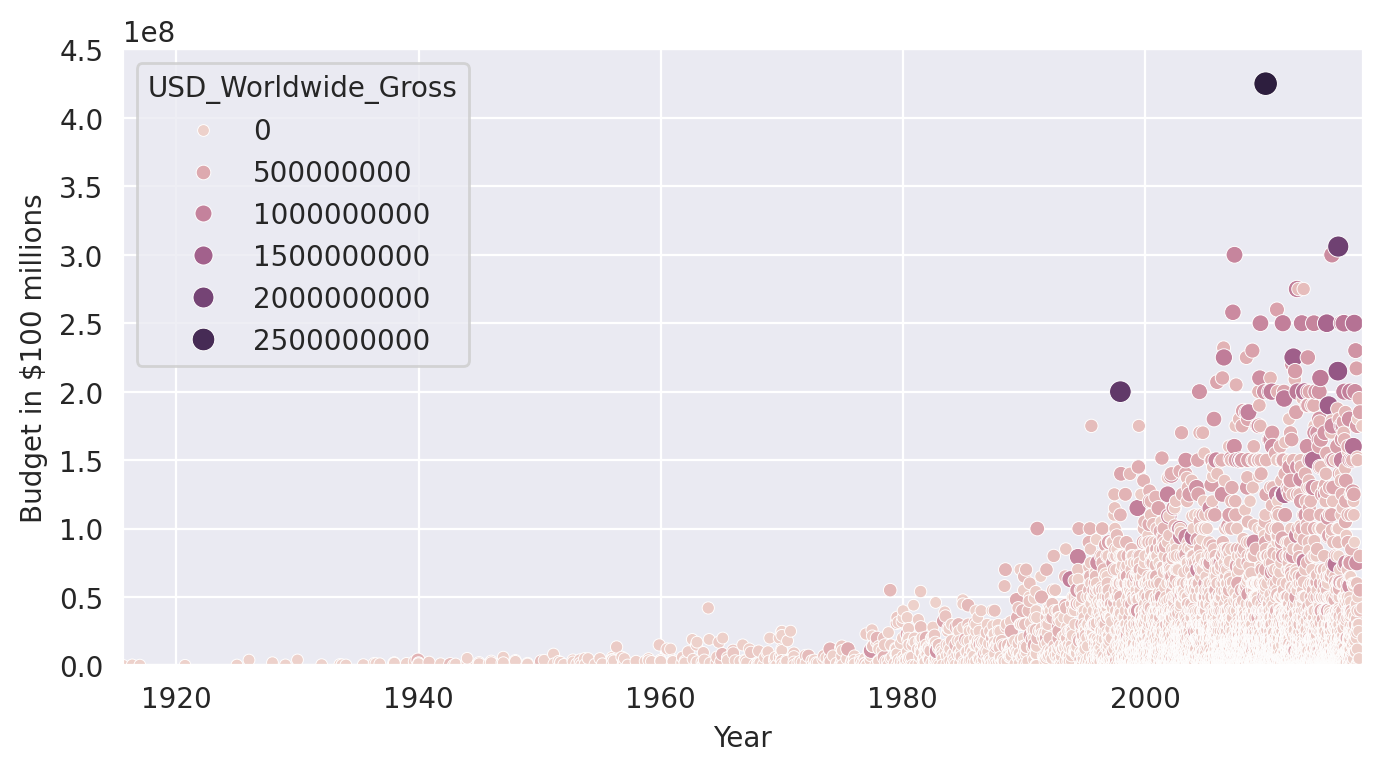

In [35]:
'''
Challenge
Now that you've seen how to create a beautiful bubble chart in Seaborn, it's time to create your own.
Can you write the code to replicate this chart? Notice how we are actually representing THREE dimensions in this chart:
the budget, the release date, and the worldwide revenue. This is what makes bubble charts so awesomely informative.
'''

'''
Solution: Movie Budgets over Time

Alright, I hope that was fairly straightforward. All you needed to do is change a few arguments:
'''

plt.figure(figsize=(8, 4), dpi=200)

with sns.axes_style('darkgrid'):
  ax = sns.scatterplot(data=data_clean,
                       x='Release_Date',
                       y='USD_Production_Budget',
                       hue='USD_Worldwide_Gross',
                       size='USD_Worldwide_Gross')

  ax.set(ylim=(0, 450000000),
         xlim=(data_clean.Release_Date.min(), data_clean.Release_Date.max()),
         xlabel='Year',
         ylabel='Budget in $100 millions')

# Converting Years to Decades Trick

**Challenge**: Create a column in `data_clean` that has the decade of the release.

<img src=https://i.imgur.com/0VEfagw.png width=650>

Here's how:
1. Create a [`DatetimeIndex` object](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DatetimeIndex.html) from the Release_Date column.
2. Grab all the years from the `DatetimeIndex` object using the `.year` property.
<img src=https://i.imgur.com/5m06Ach.png width=650>
3. Use floor division `//` to convert the year data to the decades of the films.
4. Add the decades as a `Decade` column to the `data_clean` DataFrame.

In [36]:
'''
To create a DatetimeIndex, we just call the constructor and provide our release date column as an argument to initialise the DatetimeIndex object.
Then we can extract all the years from the DatetimeIndex.
'''

dt_index = pd.DatetimeIndex(data_clean.Release_Date)
year = dt_index.year
year

Index([1915, 1916, 1916, 1920, 1925, 1925, 1927, 1929, 1930, 1931,
       ...
       2017, 2017, 2017, 2017, 2017, 2017, 2017, 2017, 2017, 2017],
      dtype='int32', name='Release_Date', length=5384)

In [37]:
'''
Now, all we need to do is convert the years to decades. For that, we will use floor division (aka integer division).
The difference to regular division is that the result is effectively rounded down.
'''

5.0 / 2
# Outpu: 2.5

2.5

In [38]:
5.0 // 2
# Output: 2.0

2.0

In [39]:
'''
In our case, we will use the floor division by 10 and then multiplication by 10 to convert the release year to the release decade:
'''

# How to convert the year 1999 to the 90s decade

1999 // 10

199

In [40]:
199 * 10

1990

In [41]:
# We can do this for all the years and then add the decades back as a column.

decades = year // 10 * 10
data_clean['Decades'] = decades

### Separate the "old" (before 1969) and "New" (1970s onwards) Films

**Challenge**: Create two new DataFrames: `old_films` and `new_films`
* `old_films` should include all the films before 1969 (up to and including 1969)
* `new_films` should include all the films from 1970 onwards
* How many films were released prior to 1970?
* What was the most expensive film made prior to 1970?

In [42]:
# Now that we have our Decades column we can use it to create subsets of our data.

old_films = data_clean.query('Release_Date <= 1960')
old_films

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross,Decades
0,5293,1915-08-02,The Birth of a Nation,110000,11000000,10000000,1910
1,5140,1916-05-09,Intolerance,385907,0,0,1910
2,5230,1916-12-24,"20,000 Leagues Under the Sea",200000,8000000,8000000,1910
3,5299,1920-09-17,Over the Hill to the Poorhouse,100000,3000000,3000000,1920
4,5222,1925-01-01,The Big Parade,245000,22000000,11000000,1920
...,...,...,...,...,...,...,...
83,4440,1959-03-29,Some Like it Hot,2883848,25000000,25000000,1950
84,2802,1959-11-18,Ben-Hur,15000000,73000000,73000000,1950
85,4171,1960-01-01,Exodus,4000000,21750000,21750000,1960
86,4347,1960-01-01,The Apartment,3000000,24600000,18600000,1960


In [43]:
new_films = data_clean.query('Release_Date >= 1960')
new_films

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross,Decades
85,4171,1960-01-01,Exodus,4000000,21750000,21750000,1960
86,4347,1960-01-01,The Apartment,3000000,24600000,18600000,1960
87,4357,1960-01-01,Elmer Gantry,3000000,10400000,10400000,1960
88,3151,1960-07-10,Spartacus,12000000,60000000,30000000,1960
89,3185,1960-10-24,The Alamo,12000000,7900000,7900000,1960
...,...,...,...,...,...,...,...
5379,1295,2017-10-02,John Wick: Chapter Two,40000000,166893990,92029184,2010
5380,70,2017-10-03,Kong: Skull Island,185000000,561137727,168052812,2010
5381,94,2017-12-05,King Arthur: Legend of the Sword,175000000,140012608,39175066,2010
5382,1254,2017-12-05,Snatched,42000000,57850343,45850343,2010


In [44]:
'''
The cut-off for our calculation is 1960 in the Decade column because this will still include 1969.
When we inspect our old_films DataFrame we see that it only includes 153 films.
As we saw in the bubble chart, the bulk of films in the dataset have been released in the last 30 years.
'''

old_films.describe()

,Rank,Release_Date,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross,Decades
count,88.00,88,88.00,88.00,88.00,88.00
mean,"4,554.86",1946-02-22 23:27:16.363636352,"2,583,710.68","25,893,944.59","19,451,591.68","1,941.14"
min,"2,802.00",1915-08-02 00:00:00,"100,000.00",0.00,0.00,"1,910.00"
25%,"4,270.50",1939-06-27 00:00:00,"1,029,250.00","3,425,500.00","2,934,000.00","1,930.00"
50%,"4,556.50",1948-07-02 00:00:00,"2,000,000.00","9,000,000.00","9,000,000.00","1,940.00"
75%,"4,843.25",1955-05-23 00:00:00,"3,550,000.00","21,812,500.00","19,050,000.00","1,950.00"
max,"5,299.00",1960-01-01 00:00:00,"15,000,000.00","390,525,192.00","198,680,470.00","1,960.00"
std,472.15,NaN,"2,465,055.93","59,937,848.93","34,059,787.02",11.39


In [45]:
old_films.sort_values('USD_Production_Budget', ascending=False).head()

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross,Decades
84,2802,1959-11-18,Ben-Hur,15000000,73000000,73000000,1950
72,3020,1956-05-10,The Ten Commandments,13500000,80000000,80000000,1950
48,3593,1951-02-23,Quo Vadis?,8250000,30022000,30000000,1950
67,3853,1956-01-01,War and Peace,6000000,12500000,12500000,1950
73,3835,1956-10-17,Around the World in 80 Days,6000000,42000000,42000000,1950


# Seaborn Regression Plots

<Axes: xlabel='USD_Production_Budget', ylabel='USD_Worldwide_Gross'>

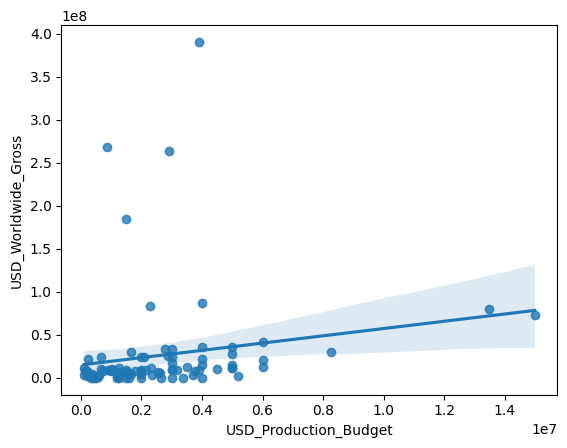

In [71]:
'''
Let's visualise the relationship between the movie budget and the worldwide revenue using linear regression.
Seaborn makes this incredibly easy with the .regplot() function.
'''

sns.regplot(data=old_films,
            x='USD_Production_Budget',
            y='USD_Worldwide_Gross')

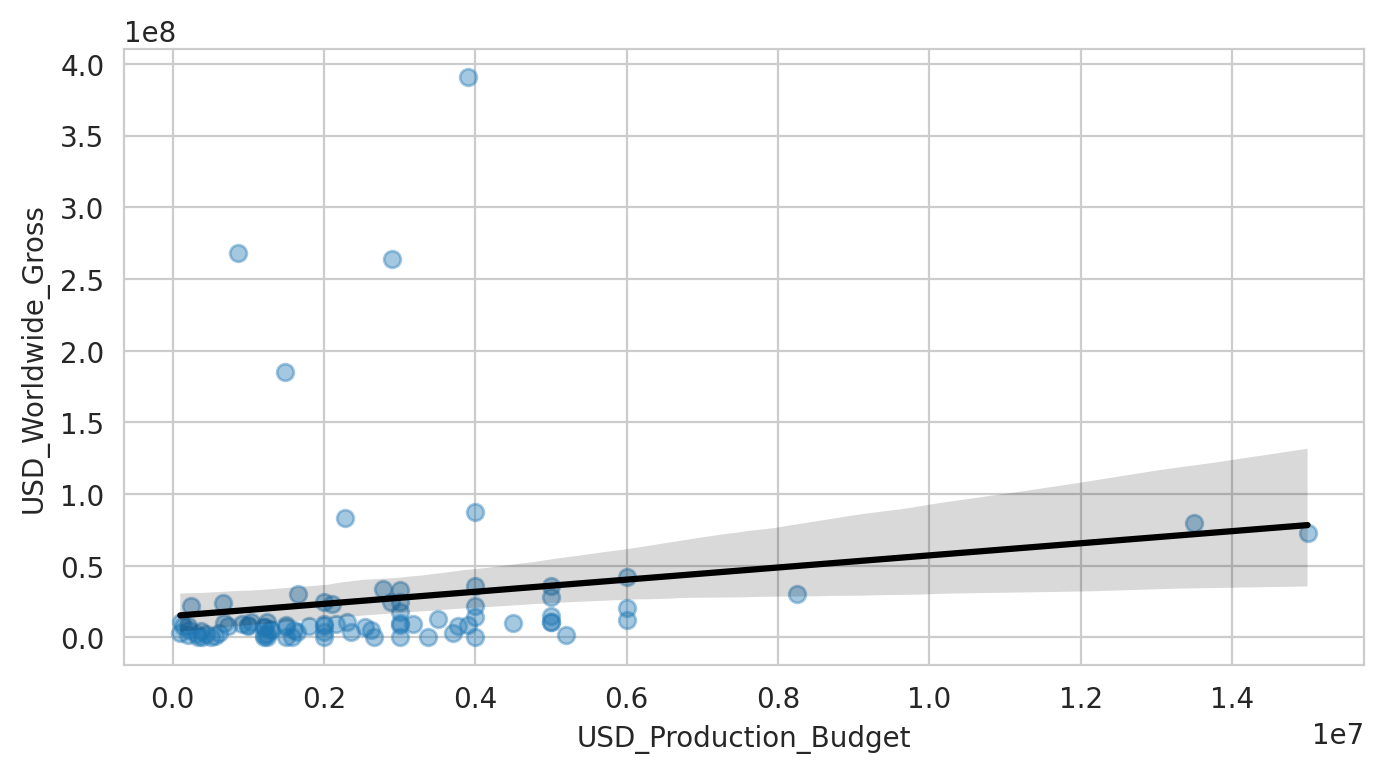

In [72]:
'''
This creates a scatter plot and draws a linear regression line together with the confidence interval at the same time.

To style the chart further, we can once again,
drop into the Matplotlib layer and supply keyword arguments as dictionaries.
We can customise the scatter plot (e.g., by changing the transparency of the dots) and the regression line itself (e.g.,
by changing the colour).
'''

plt.figure(figsize=(8,4), dpi=200)
with sns.axes_style("whitegrid"):
  sns.regplot(data=old_films,
              x='USD_Production_Budget',
              y='USD_Worldwide_Gross',
              scatter_kws = {'alpha': 0.4},
              line_kws = {'color': 'black'})

plt.show()

**Challenge**: Use Seaborn's `.regplot()` to show the scatter plot and linear regression line against the `new_films`.
<br>
<br>
Style the chart

* Put the chart on a `'darkgrid'`.
* Set limits on the axes so that they don't show negative values.
* Label the axes on the plot "Revenue in \$ billions" and "Budget in \$ millions".
* Provide HEX colour codes for the plot and the regression line. Make the dots dark blue (#2f4b7c) and the line orange (#ff7c43).

Interpret the chart

* Do our data points for the new films align better or worse with the linear regression than for our older films?
* Roughly how much would a film with a budget of $150 million make according to the regression line?

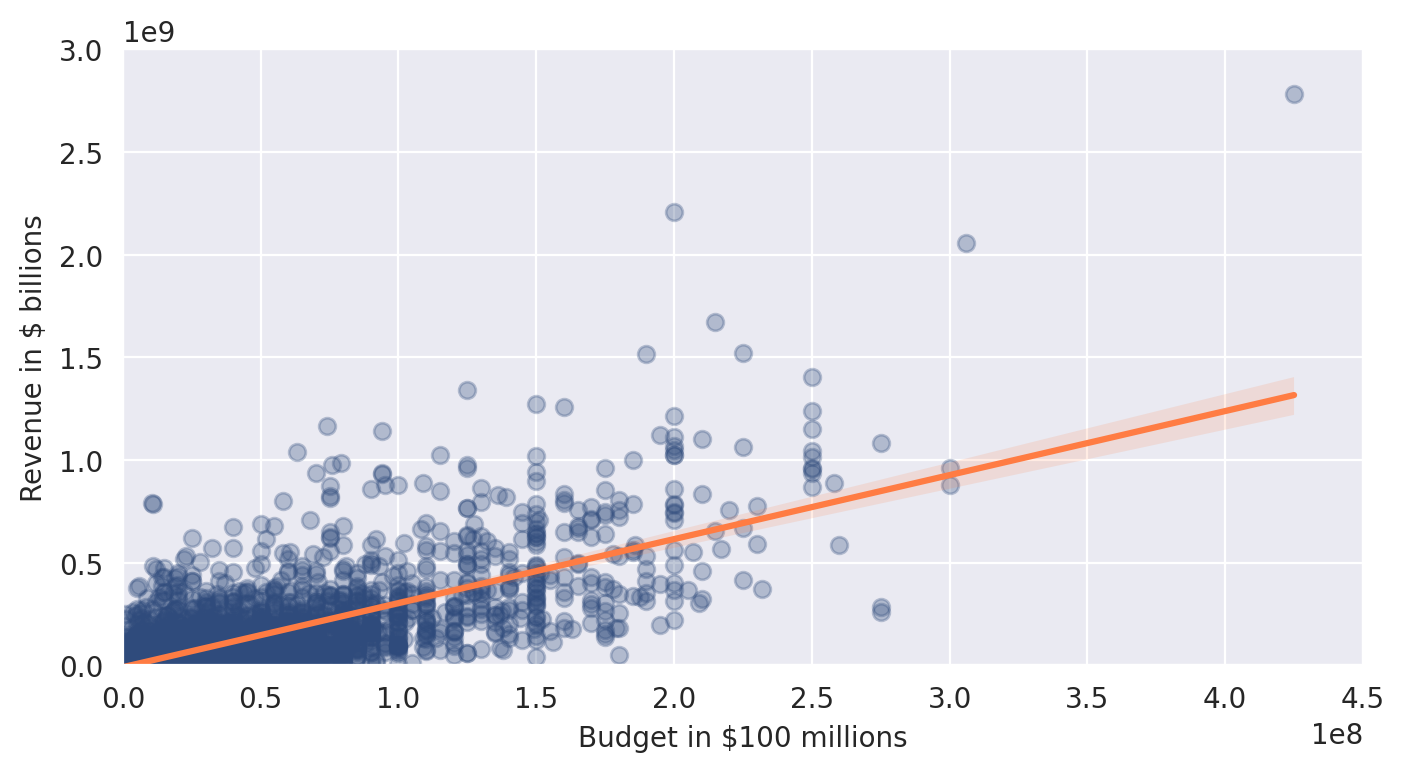

In [73]:
'''
Solution: Plotting a regression against the newer films

To style the chart we can use the same techniques as before: providing values for the .regplot() function,
as well as making use of the Matplotlib Axes object to fine-tune the limits, labels, and general style.
'''

plt.figure(figsize=(8,4), dpi=200)
with sns.axes_style('darkgrid'):
  ax = sns.regplot(data=new_films,
                   x='USD_Production_Budget',
                   y='USD_Worldwide_Gross',
                   color='#2f4b7c',
                   scatter_kws = {'alpha': 0.3},
                   line_kws = {'color': '#ff7c43'})

  ax.set(ylim=(0, 3000000000),
         xlim=(0, 450000000),
         ylabel='Revenue in $ billions',
         xlabel='Budget in $100 millions')

# Run Your Own Regression with scikit-learn

$$ REV \hat ENUE = \theta _0 + \theta _1 BUDGET$$

In [75]:
'''To find the best possible line,
our regression will estimate the y-intercept ("theta zero") and the slope ("theta one").
The line's intercept on the y-axis tells us how much revenue a movie would make if the budget was 0.
The slope tells us how much extra revenue we get for a $1 increase in the movie budget.
'''

'To find the best possible line, \nour regression will estimate the y-intercept ("theta zero") and the slope ("theta one"). \nThe line\'s intercept on the y-axis tells us how much revenue a movie would make if the budget was 0. \nThe slope tells us how much extra revenue we get for a $1 increase in the movie budget.\n'

In [76]:
'''
Let's add the LinearRegression from scikit-learn to our notebook.
'''

from sklearn.linear_model import LinearRegression

In [78]:
'''
Now we can run a LinearRegression. First, let's create a LinearRegression object that will do the work for us.
'''

regression = LinearRegression()

In [80]:
'''
Now we should specify our features and our targets (i.e., our response variable).
You will often see the features named capital X and the target named lower case y:
'''

# Explanatory Variable(s) or Feature(s)
X = pd.DataFrame(new_films, columns=['USD_Production_Budget'])

# Response Variable or Target
y = pd.DataFrame(new_films, columns=['USD_Worldwide_Gross'])

In [82]:
'''
Our LinearRegression does not like receiving Pandas Series (e.g., new_films.USD_Production_Budget),
so I've created some new DataFrames here.

Now it's time to get to work and run the calculations:
'''

# Find the best-fit line
regression.fit(X, y)

LinearRegression()

In [83]:
'''
That's it. Now we can look at the values of theta-one and theta-zero from the equation above.
'''

# Theta zero
regression.intercept_

array([-8211648.30378592])

In [54]:
# Theta one
regression.coef_

array([[3.11761857]])

In [85]:
'''
Both intercept_ and coef_ are simply attributes of the LinearRegression object.
Don't worry about the underscores at the end,
these are simply part of the attribute names that the scikit-learn developers have chosen.

How do we interpret the y-intercept? Literally, means that if a movie budget is $0,
the estimated movie revenue is -$8.65 million. Hmm... so this is clearly unrealistic.
Why would our model tell us such nonsense? Well,
the reason is that we are specifying what the model should be ahead of time - namely a straight line - and then finding the best straight line for our data.
Considering that you can't have negative revenue or a negative budget,
we have to be careful about interpreting our very simple model too literally.
After all,
it's just an estimate and this estimate will be the most accurate on the chart where we have the most data points
(rather than at the extreme left or right).

What about the slope? The slope tells us that for every extra $1 in the budget,
movie revenue increases by $3.1. So, that's pretty interesting.
That means the higher our budget, the higher our estimated revenue.
If budgets are all that matter to make lots of money,
then studio executives and film financiers should try and produce the biggest films possible,
right? Maybe that's exactly why we've seen a massive increase in budgets over the past 30 years.
'''

"\nBoth intercept_ and coef_ are simply attributes of the LinearRegression object. \nDon't worry about the underscores at the end, \nthese are simply part of the attribute names that the scikit-learn developers have chosen.\n\nHow do we interpret the y-intercept? Literally, means that if a movie budget is $0, \nthe estimated movie revenue is -$8.65 million. Hmm... so this is clearly unrealistic. \nWhy would our model tell us such nonsense? Well, \nthe reason is that we are specifying what the model should be ahead of time - namely a straight line - and then finding the best straight line for our data. \nConsidering that you can't have negative revenue or a negative budget, \nwe have to be careful about interpreting our very simple model too literally. \nAfter all, \nit's just an estimate and this estimate will be the most accurate on the chart where we have the most data points \n(rather than at the extreme left or right).\n\nWhat about the slope? The slope tells us that for every extr

In [86]:
'''
One measure of figuring out how well our model fits our data is by looking at a metric called r-squared.
This is a good number to look at in addition to eyeballing our charts.
'''

# R-squared
regression.score(X, y)

0.5574978047527492

**Challenge**: Run a linear regression for the `old_films`. Calculate the intercept, slope and r-squared. How much of the variance in movie revenue does the linear model explain in this case?

In [87]:
'''
We see that our r-squared comes in at around 0.558.
This means that our model explains about 56% of the variance in movie revenue.
That's actually pretty amazing, considering we've got the simplest possible model, with only one explanatory variable.
The real world is super complex, so in many academic circles,
if a researcher can build a simple model that explains over 50% or so of what is actually happening,
then it's a pretty decent model.

Remember how we were quite sceptical about our regression looking at the chart for our old_films?
'''

"\nWe see that our r-squared comes in at around 0.558. \nThis means that our model explains about 56% of the variance in movie revenue. \nThat's actually pretty amazing, considering we've got the simplest possible model, with only one explanatory variable. \nThe real world is super complex, so in many academic circles, \nif a researcher can build a simple model that explains over 50% or so of what is actually happening, \nthen it's a pretty decent model.\n\nRemember how we were quite sceptical about our regression looking at the chart for our old_films? \n"

In [88]:
'''
Running the numbers this time around, we can confirm just how inappropriate the linear model is for the pre-1970 films.
We still see a positive relationship between budgets and revenue, since the slope (our theta-one) is 1.6,
but the r-squared is very low.
'''

X = pd.DataFrame(old_films, columns=['USD_Production_Budget'])
y = pd.DataFrame(old_films, columns=['USD_Worldwide_Gross'])
regression.fit(X, y)
print(f'The slope coefficient is: {regression.coef_[0]}')
print(f'The intercept is: {regression.intercept_[0]}')
print(f'The r-sqaured is: {regression.score(X, y)}')

The slope coefficient is: [4.22442136]
The intercept is: 14979262.003389077
The r-sqaured is: 0.030184619698449433


# Use Your Model to Make a Prediction

We just estimated the slope and intercept! Remember that our Linear Model has the following form:

$$ REV \hat ENUE = \theta _0 + \theta _1 BUDGET$$

**Challenge**:  How much global revenue does our model estimate for a film with a budget of $350 million?

In [89]:
'''
For a $350 million budget film, our model predicts a worldwide revenue of around $600 million!
You can calculate this as follows:
'''

14979262 + 4.22442136 * 350000000

1493526738.0

In [90]:
'''
Or, using the regression object, you could also work it out like this:
'''

budget = 350000000
revenue_estimate = regression.intercept_[0] + regression.coef_[0,0]*budget
revenue_estimate = round(revenue_estimate, -6)
print(f'The estimated revenue for a $350 film is around ${revenue_estimate:.10}.')

The estimated revenue for a $350 film is around $1.494e+09.


###Better way to do it I think:

In [94]:
regression = LinearRegression()

X = new_films[["USD_Production_Budget"]]

y = new_films[["USD_Worldwide_Gross"]]

model = regression.fit(X,y)

print(model.predict([[350000000]]))

print(regression.coef_)

print(regression.intercept_)

[[1.08295485e+09]]
[[3.11761857]]
[-8211648.30378592]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
